In [1]:
#In this Notebook we compare between 6 algorithms of Classification

#1.Logistic Regression
#2.Decision Trees
#3.Random Forest
#4.Support Vector Machines (SVM)
#5. K-Nearest Neighbors (KNN)
# 6.Naive Bayes

Importing libariers , Reading Data

In [3]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [5]:
import os
for dirname, _, filenames in os.walk('/Users/Asus/Downloads/archive (9)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/Asus/Downloads/archive (9)\breast-cancer.csv


In [6]:
df = pd.read_csv(r'/Users/Asus/Downloads/archive (9)\breast-cancer.csv')

In [7]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Exploration The Data

In [11]:
df.shape #(rows,cols)

(569, 32)

<Axes: >

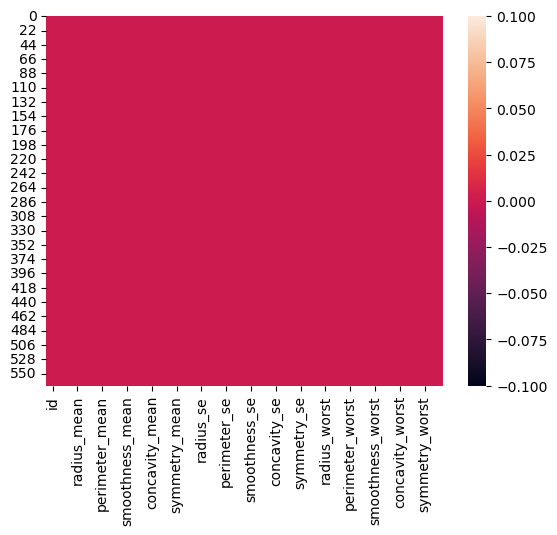

In [12]:
sns.heatmap(df.isnull()) #Data doesn't contain any Null values

In [13]:
df.isnull().sum().sum() #No null values

np.int64(0)

In [15]:
# we are ignoring np.int64 by using .item()

In [16]:
df.isnull().sum().sum().item() #No null values

0

In [17]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [18]:
df.drop(['id'],axis=1,inplace=True)
df.shape #col-=1

(569, 31)

In [19]:
df[['radius_mean','radius_mean','radius_mean']]

,radius_mean,radius_mean,radius_mean
0,17.99,17.99,17.99
1,20.57,20.57,20.57
2,19.69,19.69,19.69
3,11.42,11.42,11.42
4,20.29,20.29,20.29
...,...,...,...
564,21.56,21.56,21.56
565,20.13,20.13,20.13
566,16.60,16.60,16.60
567,20.60,20.60,20.60


In [20]:
df.drop(['perimeter_mean','area_mean'],axis=1,inplace=True)
df.shape #col-=2

(569, 29)

In [21]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
df[['radius_worst','perimeter_worst','area_worst']]

,radius_worst,perimeter_worst,area_worst
0,25.380,184.60,2019.0
1,24.990,158.80,1956.0
2,23.570,152.50,1709.0
3,14.910,98.87,567.7
4,22.540,152.20,1575.0
...,...,...,...
564,25.450,166.10,2027.0
565,23.690,155.00,1731.0
566,18.980,126.70,1124.0
567,25.740,184.60,1821.0


In [23]:
df.drop(['perimeter_worst','area_worst'],axis=1,inplace=True)
df.shape #col-=2

(569, 27)

In [24]:
df[['radius_se','perimeter_se','area_se']]

,radius_se,perimeter_se,area_se
0,1.0950,8.589,153.40
1,0.5435,3.398,74.08
2,0.7456,4.585,94.03
3,0.4956,3.445,27.23
4,0.7572,5.438,94.44
...,...,...,...
564,1.1760,7.673,158.70
565,0.7655,5.203,99.04
566,0.4564,3.425,48.55
567,0.7260,5.772,86.22


In [25]:
df.drop(['perimeter_se','area_se'],axis=1,inplace=True)
df.shape #col-=2

(569, 25)

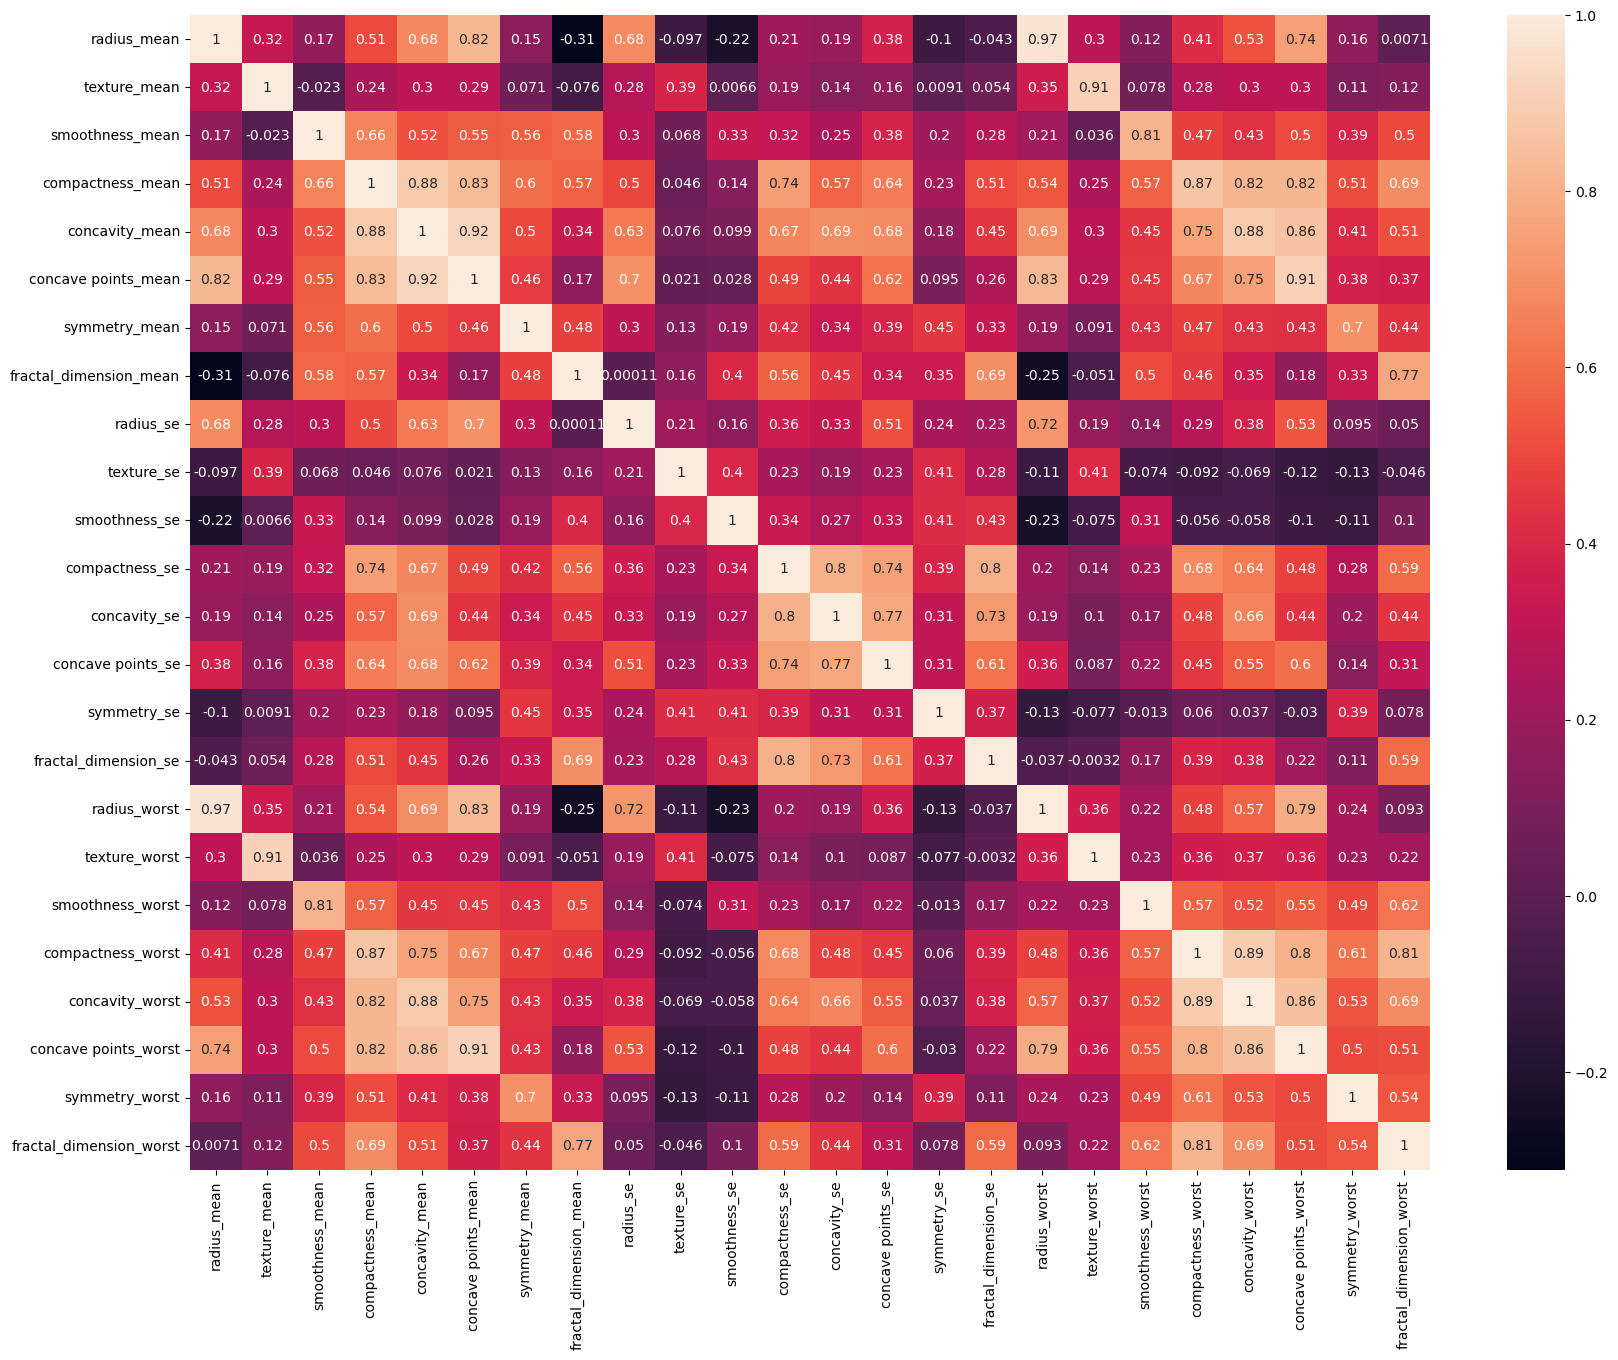

In [26]:
df_temp=df.drop(['diagnosis'],axis=1)
plt.figure(figsize=(20, 15))
sns.heatmap(df_temp.corr(), annot=True) ##visualizing relationships or patterns in a dataset
plt.show()

In [27]:
corr_coeff = df['smoothness_mean'].corr(df['smoothness_worst'])
print(f"Pearson correlation coefficient between 'smoothness_mean', 'smoothness_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'smoothness_mean', 'smoothness_worst' is : 0.8053241954943632


In [28]:
corr_coeff = df['symmetry_mean'].corr(df['symmetry_worst'])
print(f"Pearson correlation coefficient between 'symmetry_mean', 'symmetry_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'symmetry_mean', 'symmetry_worst' is : 0.6998257976437305


In [29]:
corr_coeff = df['radius_mean'].corr(df['radius_worst'])
print(f"Pearson correlation coefficient between 'radius_mean', 'radius_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'radius_mean', 'radius_worst' is : 0.9695389726112065


In [30]:
corr_coeff = df['concave points_worst'].corr(df['concave points_mean'])
print(f"Pearson correlation coefficient between 'radius_mean', 'radius_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'radius_mean', 'radius_worst' is : 0.9101553142985933


In [31]:
corr_coeff = df['texture_mean'].corr(df['texture_worst'])
print(f"Pearson correlation coefficient between 'texture_mean', 'texture_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'texture_mean', 'texture_worst' is : 0.9120445888404213


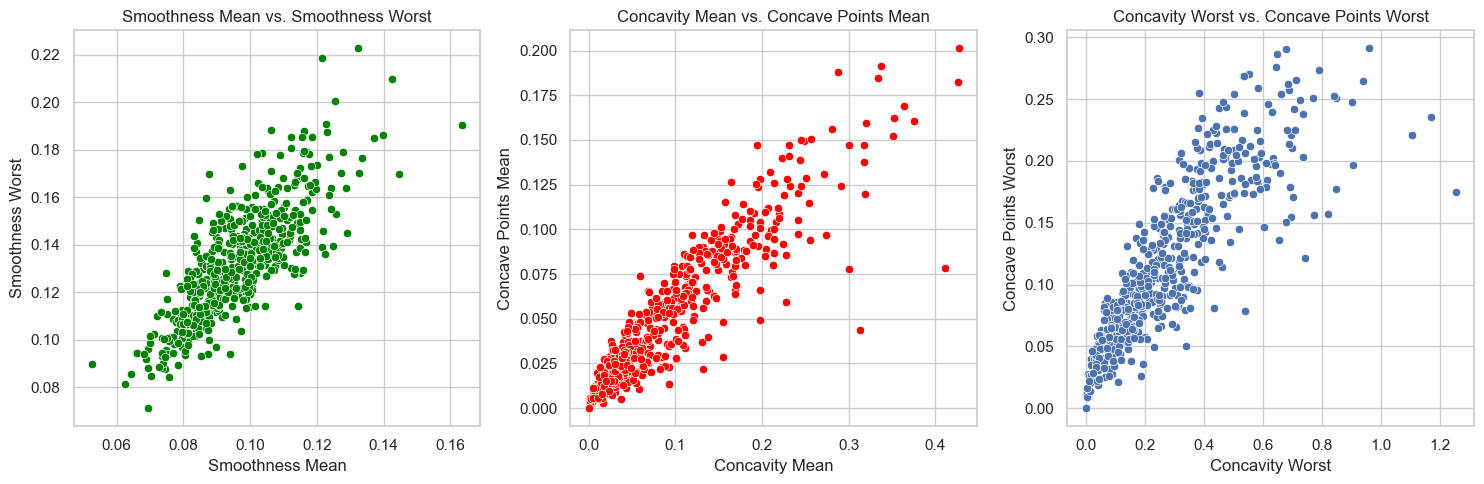

In [32]:
sns.set(style="whitegrid") 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.scatterplot(x='smoothness_mean', y='smoothness_worst', data=df, ax=axes[0], color='green')
axes[0].set_title('Smoothness Mean vs. Smoothness Worst')
axes[0].set_xlabel('Smoothness Mean')
axes[0].set_ylabel('Smoothness Worst')

# Plot 2
sns.scatterplot(x='concavity_mean', y='concave points_mean', data=df, ax=axes[1], color='red')
axes[1].set_title('Concavity Mean vs. Concave Points Mean')
axes[1].set_xlabel('Concavity Mean')
axes[1].set_ylabel('Concave Points Mean')

# Plot 3
sns.scatterplot(x='concavity_worst', y='concave points_worst', data=df, ax=axes[2])
axes[2].set_title('Concavity Worst vs. Concave Points Worst')
axes[2].set_xlabel('Concavity Worst')
axes[2].set_ylabel('Concave Points Worst')

plt.tight_layout()
plt.show()

In [33]:
df.drop(['radius_worst','concave points_mean','texture_worst','symmetry_worst','smoothness_worst'],axis=1,inplace=True)

Targrt Col "diagnosis"

In [34]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [35]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Col 'diagnosis' has 2 vals {M,B} M for Malignant, B for Benign

C:\Users\Asus\AppData\Local\Temp\ipykernel_24652\1431807507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set3')


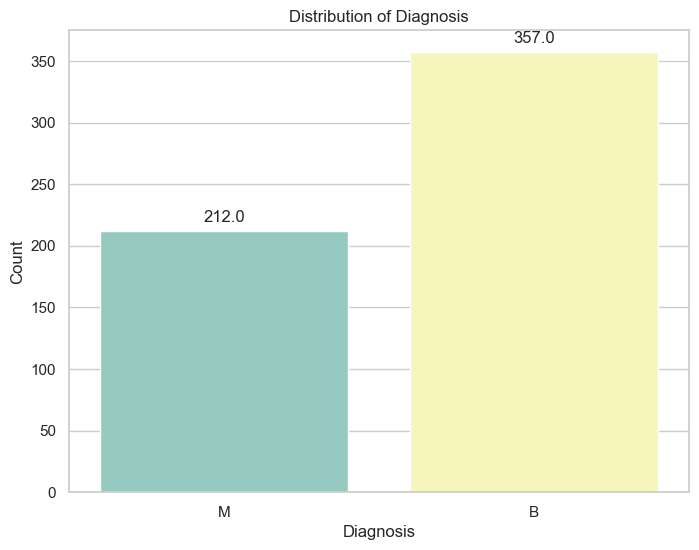

In [36]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='Set3')

plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Display the count values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

In [38]:
 pd.get_dummies(df['diagnosis'])

,B,M
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
564,False,True
565,False,True
566,False,True
567,False,True


In [39]:
 #pd.get_dummies(df['diagnosis'])

In [40]:
df['diagnosis']=df['diagnosis'].map({'M': 0, 'B': 1}) 
df['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [41]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.66560,0.7119,0.2654,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.18660,0.2416,0.1860,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.42450,0.4504,0.2430,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.86630,0.6869,0.2575,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.20500,0.4000,0.1625,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.21130,0.4107,0.2216,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.19220,0.3215,0.1628,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.30940,0.3403,0.1418,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.86810,0.9387,0.2650,0.12400


In [42]:
from sklearn.preprocessing import  StandardScaler

scl =StandardScaler()
X_scaled = scl.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2,random_state=42)

In [44]:
X_train, X_test, y_train, y_test

(array([[-1.44798723, -0.45602336,  0.72871411, ...,  4.7006688 ,
          0.91959172,  1.85943247],
        [ 1.97750799,  1.69418666,  1.26245493, ...,  1.9468903 ,
          2.6752184 ,  2.46346488],
        [-1.40708919, -1.26351565, -1.36283822, ..., -0.63561662,
         -0.97048581,  0.05287682],
        ...,
        [ 0.04621146, -0.57470379, -2.28229573, ..., -1.12035839,
         -1.23756033, -1.26047806],
        [-0.04183295,  0.07687501,  0.68601485, ...,  0.64628167,
          1.03683652,  1.19444266],
        [-0.5530585 ,  0.28631105, -1.15503513, ..., -0.75651421,
         -0.61357437, -0.84042616]]),
 array([[-0.47069438, -0.16048584,  0.23411429, ..., -0.02441212,
         -0.19956318,  0.19695794],
        [ 1.36687747,  0.47014935, -0.44622733, ..., -0.01673608,
          0.97897545, -1.00057787],
        [ 0.37850807,  0.04429607,  0.91374426, ...,  0.51291052,
          0.56024403, -0.20813168],
        ...,
        [-0.74050787, -1.01451947,  0.35153727, ..., -

In [45]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.10952635,
         2.29607613,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ..., -0.14674897,
         1.0870843 ,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  0.85497394,
         1.95500035,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.3267666 ,
         0.41406869, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  3.19760468,
         2.28998549,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.30583065,
        -1.74506282, -0.75120669]])

In [46]:
from sklearn.linear_model import LogisticRegression
log_cls = LogisticRegression(random_state=42)

In [47]:
log_cls

LogisticRegression(random_state=42)

In [48]:
log_cls.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [49]:
y_pred=log_cls.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

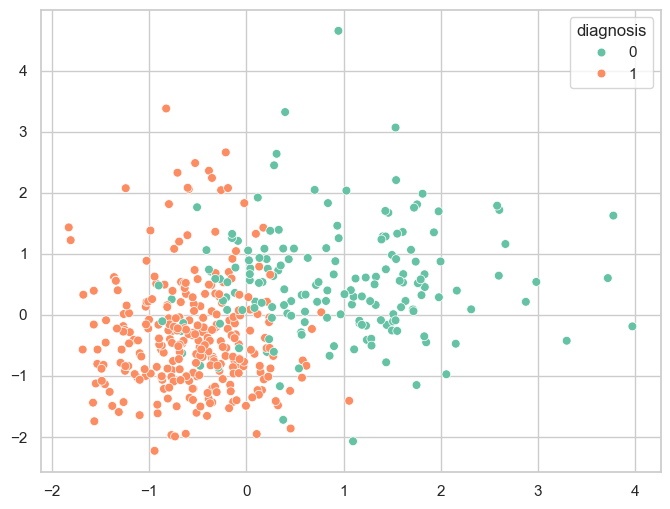

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='Set2', s=40)
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for LogisticRegression:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for LogisticRegression:
[[42  1]
 [ 2 69]]
____________________________________________________________________________________________________
num of True Positive : 69
num of True Negative : 42
num of False Positive : 1
num of False Negative : 2


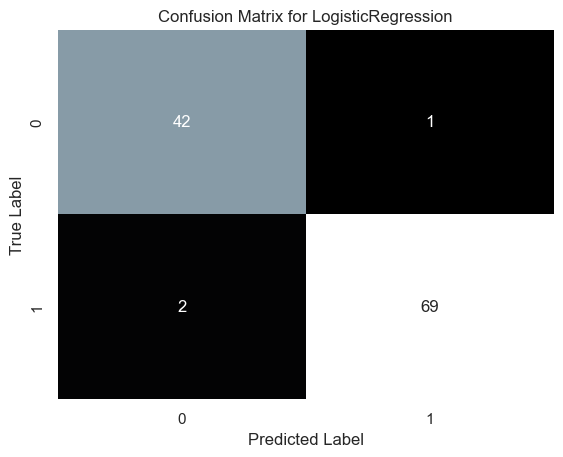

In [52]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for LogisticRegression:')
print(classification_rep)


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LogisticRegression : {accuracy*100:.2f} %')

Accuracy of LogisticRegression : 97.37 %


In [55]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_mdl = DecisionTreeClassifier(random_state=42)

In [56]:
decision_tree_mdl

DecisionTreeClassifier(random_state=42)

In [57]:
decision_tree_mdl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
y_pred = decision_tree_mdl.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for DecisionTree :')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for DecisionTree :
[[39  4]
 [ 7 64]]
____________________________________________________________________________________________________
num of True Positive : 64
num of True Negative : 39
num of False Positive : 4
num of False Negative : 7


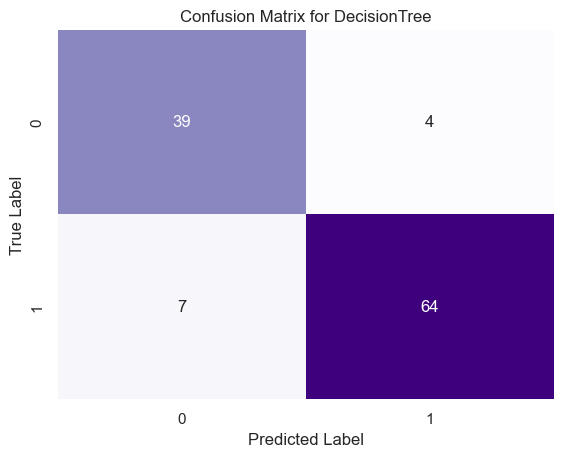

In [60]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix for DecisionTree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [61]:
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for DecisionTree:')
print(classification_rep)


Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.94      0.90      0.92        71

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114



In [62]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of DecisionTree : {accuracy*100:.2f} %')

Accuracy of DecisionTree : 90.35 %


In [63]:
from sklearn.ensemble import RandomForestClassifier

random_forest_mdl = RandomForestClassifier(random_state=42)

In [64]:
random_forest_mdl

RandomForestClassifier(random_state=42)

In [65]:
random_forest_mdl.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = random_forest_mdl.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Random Forest:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for Random Forest:
[[40  3]
 [ 2 69]]
____________________________________________________________________________________________________
num of True Positive : 69
num of True Negative : 40
num of False Positive : 3
num of False Negative : 2


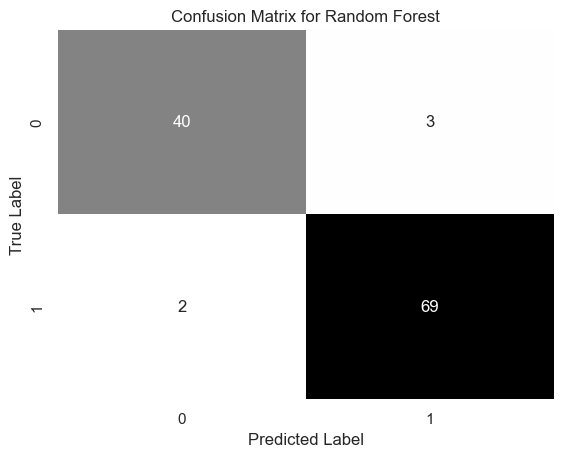

In [68]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [69]:
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Random Forest:')
print(classification_rep)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [70]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest : {accuracy*100:.2f} %')

Accuracy of Random Forest : 95.61 %


In [71]:
from sklearn.svm import SVC

svm_mdl = SVC(random_state=42)

In [72]:
svm_mdl

SVC(random_state=42)

In [73]:
svm_mdl.fit(X_train, y_train)

SVC(random_state=42)

In [74]:
y_pred = svm_mdl.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [75]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Support Vector Machines:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for Support Vector Machines:
[[39  4]
 [ 1 70]]
____________________________________________________________________________________________________
num of True Positive : 70
num of True Negative : 39
num of False Positive : 4
num of False Negative : 1


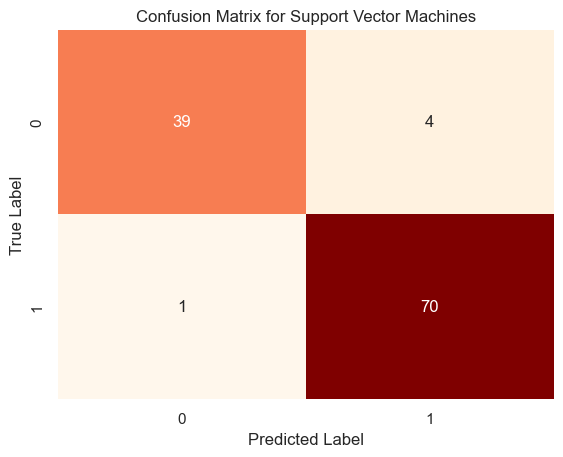

In [76]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.title('Confusion Matrix for Support Vector Machines')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Support Vector Machines:')
print(classification_rep)


Classification Report for Support Vector Machines:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Support Vector Machines : {accuracy*100:.2f} %')

Accuracy of Support Vector Machines : 95.61 %


In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize kNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

In [81]:
y_pred_knn

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn_mdl = KNeighborsClassifier()

In [83]:
knn_mdl

KNeighborsClassifier()

In [84]:
knn_mdl.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
y_pred= knn_mdl.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for k-Nearest Neighbors:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for k-Nearest Neighbors:
[[40  3]
 [ 3 68]]
____________________________________________________________________________________________________
num of True Positive : 68
num of True Negative : 40
num of False Positive : 3
num of False Negative : 3


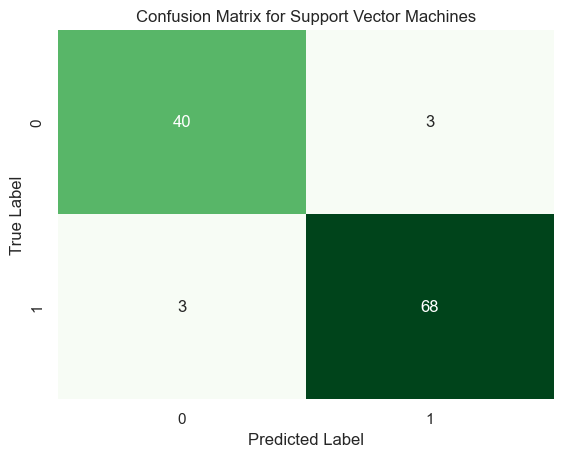

In [87]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for Support Vector Machines')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [88]:
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for k-Nearest Neighbors:')
print(classification_rep)


Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of k-Nearest Neighbors : {accuracy*100:.2f} %')

Accuracy of k-Nearest Neighbors : 94.74 %


📌📌Naive Bayes(Fitting+Prediction)

In [90]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_mdl = GaussianNB()

In [91]:
naive_bayes_mdl

GaussianNB()

In [92]:
naive_bayes_mdl.fit(X_train, y_train)

GaussianNB()

In [93]:
y_pred= naive_bayes_mdl.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

📌Confusion_matrix ,Classification_report and Accuracy_score for Naive Bayes

In [94]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Naive Bayes:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for Naive Bayes:
[[38  5]
 [ 2 69]]
____________________________________________________________________________________________________
num of True Positive : 69
num of True Negative : 38
num of False Positive : 5
num of False Negative : 2


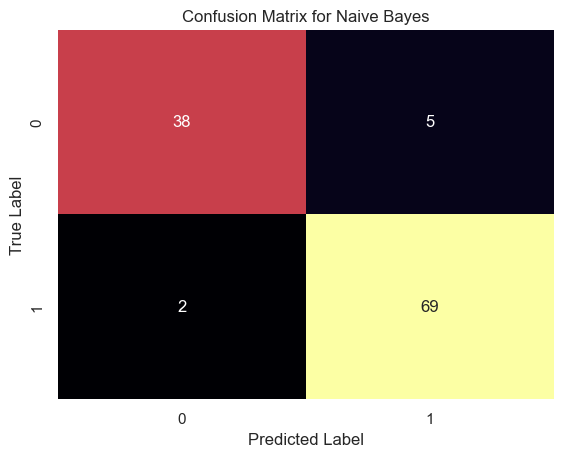

In [95]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [96]:
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for Naive Bayes:')
print(classification_rep)


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naive Bayes : {accuracy*100:.2f} %')

Accuracy of Naive Bayes : 93.86 %


Notes for Confusion Matrix ,Accuracy , Precision , Recall and F1 Score 📝

A confusion matrix is a performance measurement tool for classification problems in machine learning. It summarizes the results of a classification model by presenting the count of true positive, true negative, false positive, and false negative predictions. The matrix allows for a detailed analysis of the model's performance and is especially useful when evaluating the effectiveness of a classifier.

Here are the key components of a confusion matrix:

True Positive (TP): The number of instances that were correctly predicted as positive by the model.

True Negative (TN): The number of instances that were correctly predicted as negative by the model.

False Positive (FP): The number of instances that were incorrectly predicted as positive by the model. Also known as a Type I error.

False Negative (FN): The number of instances that were incorrectly predicted as negative by the model. Also known as a Type II error.

The confusion matrix is typically represented as a 2x2 matrix for binary classification problems:

mathematica Copy code Predicted Negative Predicted Positive Actual Negative TN FP Actual Positive FN TP From the confusion matrix, various performance metrics can be derived, including:

Accuracy: The overall correctness of the model, calculated as (TP + TN) / (TP + TN + FP + FN).

Precision (Positive Predictive Value): The proportion of instances predicted as positive that are actually positive, calculated as TP / (TP + FP).

Recall (Sensitivity, True Positive Rate): The proportion of actual positive instances that are correctly predicted, calculated as TP / (TP + FN).

F1 Score: The harmonic mean of precision and recall, calculated as 2 (Precision Recall) / (Precision + Recall).

Confusion matrices are not limited to binary classification; they can be extended to handle multiclass problems as well. The concepts of true positive, true negative, false positive, and false negative remain, but they are extended to each class in a multiclass scenario.

Analyzing a confusion matrix helps to understand where a classifier is making errors and provides insights into the strengths and weaknesses of the model. It is a valuable tool for evaluating and fine-tuning machine learning models, especially in scenarios where different misclassification types have different consequences.

THANK YOU !!

MOHAMMED ASIF